Using this file to test making a custom halo model from information derived from IllustrisTNG using halomod

In [1]:
from halomod import TracerHaloModel
import numpy as np
import matplotlib.pyplot as plt
import halomod
import hmf
import sys
import pickle as pkl

sys.path.append("/Users/cosinga/code/pkthunder/io/")

from tng_loader import TNGLoader

plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

/Users/cosinga/Library/Python/3.8/lib/python/site-packages/halomod/halo_exclusion.py:18: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  warnings.warn(


In [2]:
TNGPATH = '/Users/cosinga/sims/illustris/L75n1820TNG/output/'

tngl = TNGLoader(TNGPATH, 'tng100', 99)

In [3]:
hm = TracerHaloModel()

In [6]:
# adjusting the halo mass function to look like TNG's

# first, change the range of masses to match TNG
mass_min = 9; mass_max = 14
hm.update(Mmin = mass_min, Mmax = mass_max)

# then make sure we are using M200m, which is the mass definition Im using from TNG
from hmf.halos import mass_definitions as md
hm.update(mdef_model = 'SOMean', mdef_params = {'overdensity' : 200})

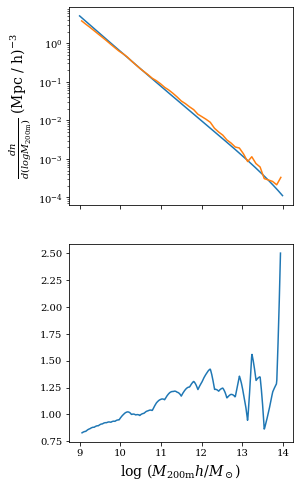

In [14]:
# taken from halomod tutorial, assuming the units are correct
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (4, 8))
plt.sca(axs[0])
plt.plot(np.log10(hm.m), hm.dndlog10m)
plt.ylabel(r"$\frac{dn}{d(log M_{200\mathrm{m}})}$ (Mpc / h)$^{-3}$", fontsize = 14)
plt.yscale('log')

hmass = tngl.getHaloMass()
box = tngl.getBox()
log_hmass = np.log10(hmass[hmass > 0])
nbins = 50

bins = np.linspace(mass_min, mass_max, nbins)
bin_width = (mass_max - mass_min) / nbins
hist, edges = np.histogram(log_hmass, bins)
medges = (edges[:-1] + edges[1:]) / 2
hist = hist / box ** 3 / bin_width
plt.plot(medges, hist, label = 'TNG100')

plt.sca(axs[1])
plt.xlabel(r"log ($M_{200\mathrm{m}} h / M_\odot$) ", fontsize = 14)

from scipy.interpolate import interp1d
intf = interp1d(medges, hist, kind = 'linear')
logm = np.log10(hm.m)
in_range_mask = (logm > medges[0]) & (logm < medges[-1])
tng_hmf = intf(logm[in_range_mask])
axs[1].plot(logm[in_range_mask], tng_hmf / hm.dndlog10m[in_range_mask])


I'm now fairly confident that I'm calculating the halo mass function from IllustrisTNG correctly. Now to convert it to a numerical sampling for hmf